# Projekt Wino - Analiza KNN jakości wina 

In [1]:
! cd "C:\Users\marty\Desktop\PROJEKT3" 

Active code page: 1250


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from termcolor import colored as cl
import pickle

In [2]:
dane = pd.read_csv('winequality-red.csv')

In [3]:
dane

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Brakujące wartości 

In [4]:
braki = dict()
for i in dane.columns[:11]:
    braki[i] = 0
    for j in dane[i].isnull():
        if(j==True):
            braki[i] = braki[i].get(i,0) + 1
print(braki)

{'fixed acidity': 0, 'volatile acidity': 0, 'citric acid': 0, 'residual sugar': 0, 'chlorides': 0, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 0, 'sulphates': 0, 'alcohol': 0}


W analizowanym zbiorze danych <b>nie ma brakujących wartości</b>.

# Wartości odstające 

In [5]:
dane = dane[dane["total sulfur dioxide"]<250]

# Opis zmiennych

In [6]:
dane.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,8.320163,0.528106,0.270463,2.531590,0.087513,15.847840,46.170946,0.996751,3.311490,0.658334,10.420632,5.634314
std,1.742123,0.178990,0.194384,1.395974,0.047076,10.438642,31.826498,0.001884,0.154115,0.169532,1.064260,0.806630
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Zmienna zależna, targetowa - jakość wina (Quality of wine)

<AxesSubplot:title={'center':'Quality of wine'}, xlabel='Rating', ylabel='Frequency'>

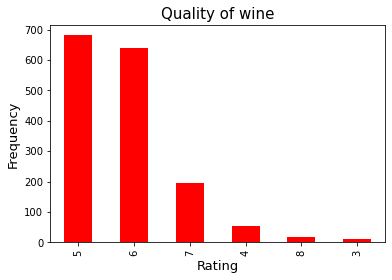

In [7]:
plt.title("Quality of wine", fontsize=15)
plt.xlabel("Rating", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
dane.quality.value_counts().plot.bar(color='red')

Oceny 5 i 6 są najczęstszymi ocenami, a rozkład częstotliwości wyższych ocen, tj. 7 i 8 jest dużo niższy.

# Korelacja

In [8]:
dane.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256785,0.674227,0.117248,0.093505,-0.153587,-0.114809,0.669013,-0.685227,0.182836,-0.061258,0.124790
volatile acidity,-0.256785,1.000000,-0.551231,0.008531,0.060113,-0.007234,0.091062,0.019059,0.232618,-0.262772,-0.200072,-0.388955
citric acid,0.674227,-0.551231,1.000000,0.134610,0.206571,-0.066781,0.017188,0.371816,-0.539549,0.316095,0.105767,0.222943
residual sugar,0.117248,0.008531,0.134610,1.000000,0.060344,0.178818,0.173644,0.369732,-0.076653,0.010114,0.033473,0.005146
chlorides,0.093505,0.060113,0.206571,0.060344,1.000000,0.007648,0.056480,0.199267,-0.267717,0.370713,-0.219899,-0.127500
free sulfur dioxide,-0.153587,-0.007234,-0.066781,0.178818,0.007648,1.000000,0.673019,-0.017107,0.075814,0.054093,-0.074315,-0.055279
total sulfur dioxide,-0.114809,0.091062,0.017188,0.173644,0.056480,0.673019,1.000000,0.091664,-0.050678,0.052604,-0.229589,-0.207581
density,0.669013,0.019059,0.371816,0.369732,0.199267,-0.017107,0.091664,1.000000,-0.347961,0.146828,-0.494064,-0.171592
pH,-0.685227,0.232618,-0.539549,-0.076653,-0.267717,0.075814,-0.050678,-0.347961,1.000000,-0.199355,0.210850,-0.053828
sulphates,0.182836,-0.262772,0.316095,0.010114,0.370713,0.054093,0.052604,0.146828,-0.199355,1.000000,0.095756,0.253822


<AxesSubplot:>

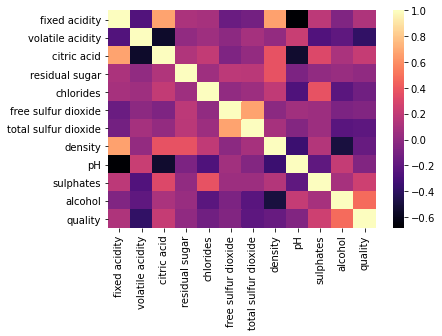

In [9]:
sns.heatmap(dane.corr(), cmap='magma')

### Wnioski z korelacji
 -   <b>citric acid</b> i <b>fixed acidity</b>, <b>free sulfur dioxide</b> i <b>total sulfur dioxide</b>, a także <b>density</b> i <b>fixed acidity</b> są w pewnym stopniu ze sobą skorelowane.
 -  W celu zmniejszenia wymiarowości danych można zastanowić się nad usunięciem jednej cechy z pary dla tych trzech par cech.
 - <b>alcohol content</b> jest najsilniej skorelowany z <b>wine quality</b> , zaś <b>volatile acidity</b> ma najniższy wskaźnik korelacji z <b>wine quality</b>.

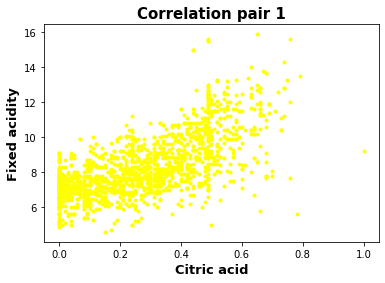

In [10]:
plt.scatter(dane['citric acid'], dane['fixed acidity'], marker='.', color='yellow')
plt.xlabel("Citric acid", fontsize=13, fontweight='bold')
plt.ylabel("Fixed acidity", fontsize=13, fontweight='bold')
plt.title('Correlation pair 1', fontweight='bold', fontsize=15)
plt.show()

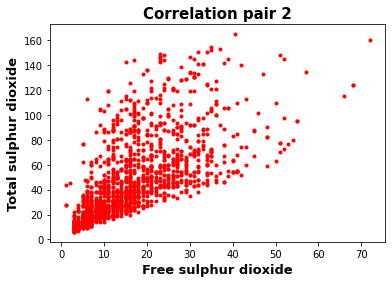

In [11]:
plt.scatter(dane['free sulfur dioxide'], dane['total sulfur dioxide'], marker='.', color='red')
plt.xlabel("Free sulphur dioxide", fontsize=13, fontweight='bold')
plt.ylabel("Total sulphur dioxide", fontsize=13, fontweight='bold')
plt.title('Correlation pair 2',  fontweight='bold', fontsize=15)
plt.show()

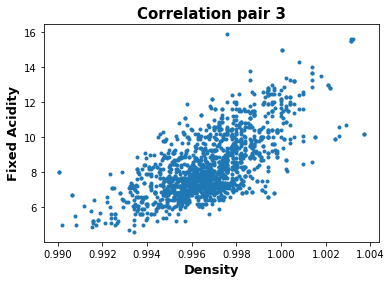

In [12]:
plt.scatter(dane['density'],dane['fixed acidity'], marker='.')
plt.xlabel("Density",fontsize=13, fontweight='bold')
plt.ylabel("Fixed Acidity", fontsize=13, fontweight='bold')
plt.title('Correlation pair 3',  fontweight='bold', fontsize=15)
plt.show()

In [13]:
corr_cols = ['citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'fixed acidity']

## Podział zbioru danych
 - Zestaw danych jest przekształcany w zestaw danych z kolumną binarną o wartości <b>1 dla jakości >= 7 </b> i <b>0 dla jakości < 7</b>.

In [14]:
Wine_Quality = []
for k in dane.quality:
    if(k>=7):
        Wine_Quality.append(1)
    else:
        Wine_Quality.append(0)

dane = dane.drop('quality', axis=1)
dane['Wine_Quality'] = Wine_Quality
dane.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Wine_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Model klasyfikacji KNN
 - W tym modelu algorytm klasyfikacji najbliższych sąsiadów służy do klasyfikowania wina jako dobrego(ocena>=7) lub złego(ocena<7).

In [15]:
dane.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Wine_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## ANALIZA CECH
 - Rozkłady prawdopodobieństwa cech zbioru danych są wykreślane w odniesieniu do dwóch klas
 - Wykres <b>czerwony</b> pokazuje rozkład grupy pozytywnej który przyjmuje dobrą cechę (jakość wina) jako <b>Prawdę</b>
 - Wykres <b>szary</b> pokazuje rozkład grupy negatywnej który przyjmuje dobrą cechę (jakość wina) jako <b>Fałsz</b>

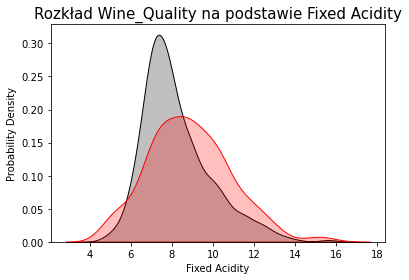

In [16]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['fixed acidity'], shade = True, color='black', label="NOT GOOD")
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['fixed acidity'], shade = True, color='red', label="GOOD")
plt.title("Rozkład Wine_Quality na podstawie Fixed Acidity", fontsize=15)
plt.xlabel("Fixed Acidity")
plt.ylabel("Probability Density")
plt.show()

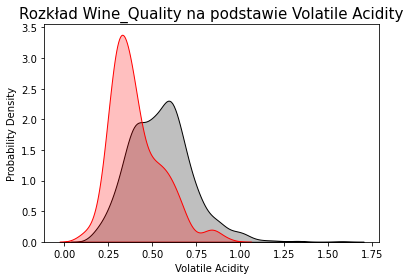

In [17]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['volatile acidity'], shade = True, color='black', label="NOT GOOD")
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['volatile acidity'], shade = True, color='red', label="GOOD")
plt.title("Rozkład Wine_Quality na podstawie Volatile Acidity", fontsize=15)
plt.xlabel("Volatile Acidity")
plt.ylabel("Probability Density")
plt.show()

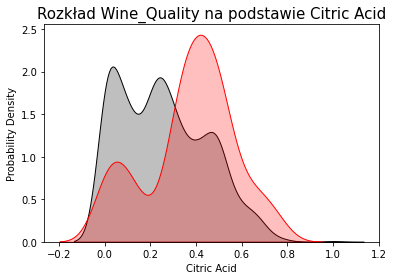

In [18]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['citric acid'], shade = True, color='black', label="NOT GOOD")
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['citric acid'], shade = True, color='red', label="GOOD")
plt.title("Rozkład Wine_Quality na podstawie Citric Acid", fontsize = 15)
plt.xlabel("Citric Acid")
plt.ylabel("Probability Density")
plt.show()

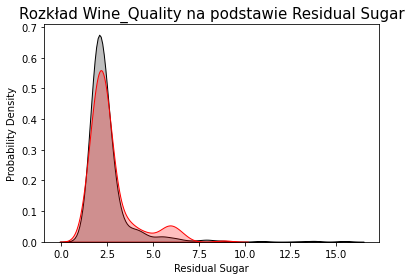

In [19]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['residual sugar'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['residual sugar'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Residual Sugar")
plt.title("Rozkład Wine_Quality na podstawie Residual Sugar", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

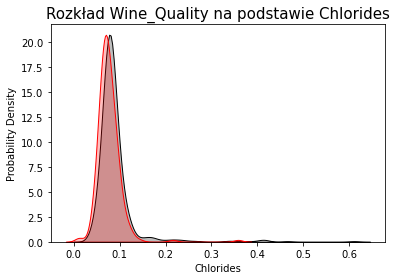

In [20]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['chlorides'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['chlorides'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Chlorides")
plt.title("Rozkład Wine_Quality na podstawie Chlorides", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

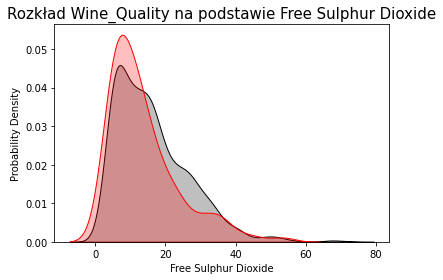

In [21]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['free sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['free sulfur dioxide'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Free Sulphur Dioxide")
plt.title("Rozkład Wine_Quality na podstawie Free Sulphur Dioxide", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

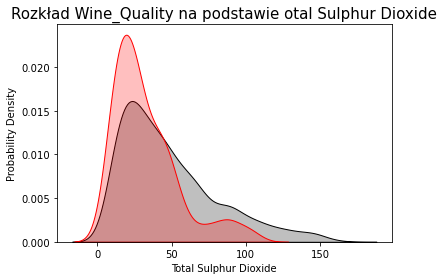

In [22]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['total sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['total sulfur dioxide'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Total Sulphur Dioxide")
plt.title("Rozkład Wine_Quality na podstawie otal Sulphur Dioxide", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

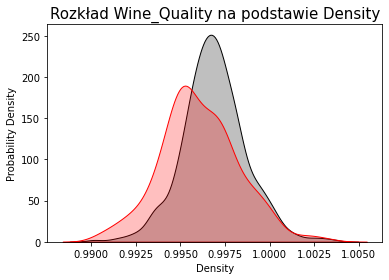

In [23]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['density'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['density'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Density")
plt.title("Rozkład Wine_Quality na podstawie Density", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

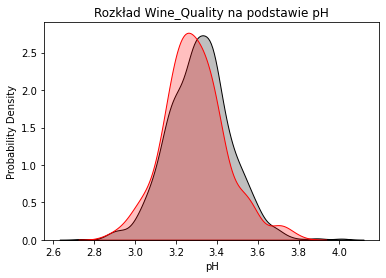

In [24]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['pH'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['pH'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("pH")
plt.title("Rozkład Wine_Quality na podstawie pH")
plt.ylabel("Probability Density")
plt.show()

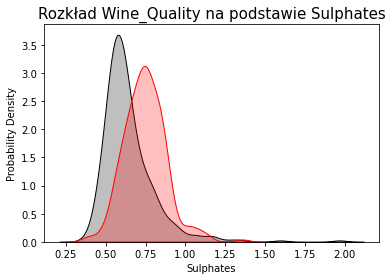

In [25]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['sulphates'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['sulphates'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Sulphates")
plt.title("Rozkład Wine_Quality na podstawie Sulphates", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

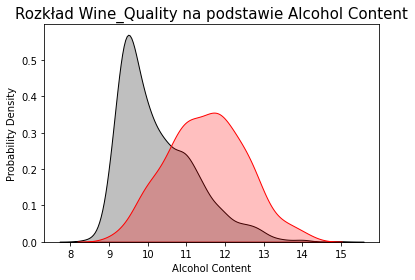

In [26]:
sns.kdeplot(dane.loc[dane['Wine_Quality']==0]['alcohol'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(dane.loc[dane['Wine_Quality']==1]['alcohol'],shade = True,color = 'red',label = 'GOOD')
plt.xlabel("Alcohol Content")
plt.title("Rozkład Wine_Quality na podstawie Alcohol Content", fontsize = 15)
plt.ylabel("Probability Density")
plt.show()

 - Żadna ze zmiennych nie miała <b> krzywych rozróżniających</b>, które mogłyby oddzielić te dwa typy klas
 - W związku z tym stwierdzono, że ostateczny model musi <b>zawierać wszystkie cechy</b> zbioru danych, aby można je było oddzielić na podstawie jakości wina

## Przygotowywanie danych treningowych i testowych

In [27]:
X = dane.drop('Wine_Quality', axis=1)  
Y = dane['Wine_Quality']                   

In [28]:
print(cl('X set shape :', attrs = ['bold']), X.shape)
print(cl('Y set shape :', attrs = ['bold']), Y.shape)

X set shape : (1597, 11)
Y set shape : (1597,)


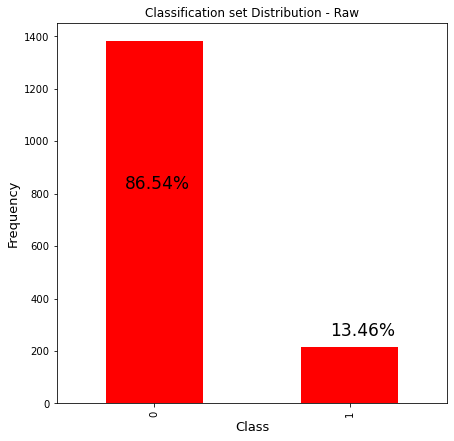

In [29]:
Y.value_counts().plot.bar(color='red', figsize=(7,7))
plt.xlabel("Class", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
zle = str(round((Y.value_counts()[0]/len(Y))*100, 2)) + "%"
dobre = str(round((Y.value_counts()[1]/len(Y))*100, 2)) + "%"
plt.text(-0.150,820,zle, fontsize=17)
plt.text(0.90,260,dobre, fontsize=17)
plt.title("Classification set Distribution - Raw")
plt.show()

- Powyższy wykres pokazuje, że zbiór jest <b>niezrównoważony</b>, a zatem <b>normalna dokładność modelu (accuracy) nie byłaby dobrym wskaźnikiem do oceny.</b> 

- Model byłby bardziej dokładny w przewidywaniu klasy 0 (wina złej jakości) niż klasy 1 (wina dobrej jakości).

### Metryki oceny:
 - <b>F1 score</b>
 - <b>Precision</b>
 - <b>Recall</b>

In [30]:
def precision(orig, preds):
    tp = 0;
    fp = 0;
    for i,j in zip(orig, preds):
        if(i==j and i==1):
            tp+=1
            continue
        if(i==0 and j==1):
            fp+=1
            continue
    return round(tp/(tp+fp), 7)

In [31]:
def recall(orig, preds):
    tp = 0
    fn = 0
    for i,j in zip(orig, preds):
        if(i==j and i==1):
            tp+=1
            continue
        if(i==1 and j==0):
            fn+=1
            continue
    return round(tp/(tp+fn), 7)

### Podział na zbiór testowy oraz treningowy

In [32]:
X_train_all, X_test, Y_train_all, Y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

In [33]:
print(cl('Train set shape :', attrs = ['bold']), X_train_all.shape, Y_train_all.shape)
print(cl('Test set shape :', attrs = ['bold']), X_test.shape, Y_test.shape)

Train set shape : (1277, 11) (1277,)
Test set shape : (320, 11) (320,)


## Skalowanie zbioru danych dla klasyfikatora KNN

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
std = StandardScaler()
std.fit(X_train_all)

StandardScaler()

In [36]:
X_train_all_scaled = pd.DataFrame(std.transform(X_train_all), columns=X_train_all.columns)

In [37]:
X_train_all_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.522093,0.567664,-0.859998,-0.103682,-0.164508,0.011435,-0.410577,0.320602,1.758147,0.197801,0.384217
1,-0.290475,0.373296,-0.034736,-0.380601,-0.164508,1.447746,2.651614,-0.290208,-0.664233,-0.799197,-0.472722
2,-0.811615,0.567664,-0.498946,-0.103682,3.305523,-0.946106,-0.879279,-0.354504,0.579692,-0.388668,-0.091860
3,-0.522093,1.400666,-0.395788,1.834752,0.137234,0.298697,1.620468,0.197368,-0.991582,-0.799197,-0.758369
4,-0.579997,-1.264942,0.635789,-0.934439,-0.617121,-0.850352,-1.098007,-1.849381,-0.140475,-0.799197,1.050726
...,...,...,...,...,...,...,...,...,...,...,...
1272,0.172761,-0.848440,0.481053,0.311697,-0.142955,1.351992,2.276652,0.127715,-0.729703,-0.564609,-0.948800
1273,1.388756,0.762031,-0.241051,0.104007,0.417423,0.107189,-0.379330,1.949429,-0.205945,1.898563,-0.472722
1274,-0.000952,0.512130,-0.344209,-0.726750,-0.164508,1.064730,2.276652,0.234874,-0.991582,2.719621,-1.234446
1275,-0.695806,0.428830,-1.272629,-0.034452,-0.142955,0.107189,1.276753,0.368824,1.103450,-0.330021,-0.663153


In [38]:
X_test_scaled = pd.DataFrame(std.transform(X_test), columns=X_test.columns)

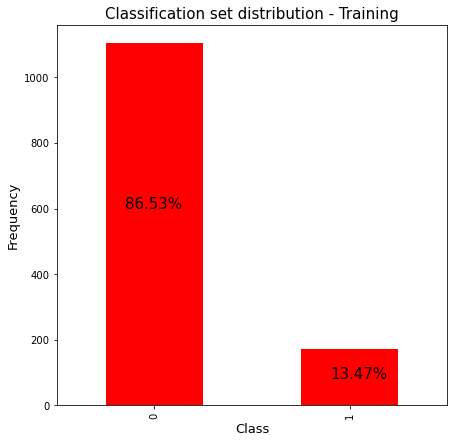

In [39]:
Y_train_all.value_counts().plot.bar(color='r', figsize=(7,7))
plt.xlabel("Class", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
zle = str(round((Y_train_all.value_counts()[0]/len(Y_train_all))*100, 2)) + "%"
dobre = str(round((Y_train_all.value_counts()[1]/len(Y_train_all))*100, 2)) + "%"
plt.text(-0.15, 600, zle, fontsize=15)
plt.text(0.90, 80, dobre, fontsize=15)
plt.title("Classification set distribution - Training", fontsize=15)
plt.show()

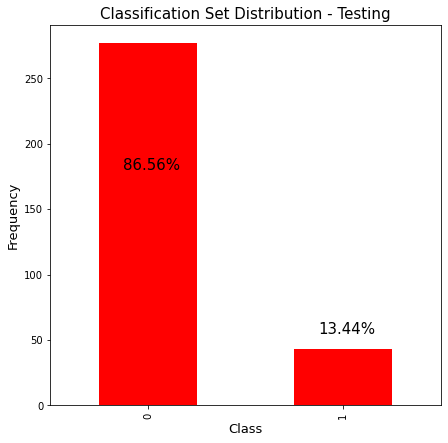

In [40]:
Y_test.value_counts().plot.bar(color ='r',figsize=(7,7))
plt.xlabel("Class",fontsize = 13)
plt.ylabel("Frequency",fontsize=13)
slabe = str(round((Y_test.value_counts()[0]/len(Y_test))*100,2))+"%"
dobre = str(round((Y_test.value_counts()[1]/len(Y_test))*100,2))+"%"
plt.text(-0.13,180,slabe,fontsize = 15)
plt.text(0.87,55,dobre,fontsize=15)
plt.title("Classification Set Distribution - Testing",fontsize=15)
plt.show()

 - Rozkład danych w zbiorze uczącym i testowym jest bardzo podobny.
 - Analiza z klasyfikatorem KNN zostanie przeprowadzona na przeskalowanych danych.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
corr_cols.append('residual sugar')
corr_cols.append('pH')

In [43]:
corr_cols

['citric acid',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'fixed acidity',
 'residual sugar',
 'pH']

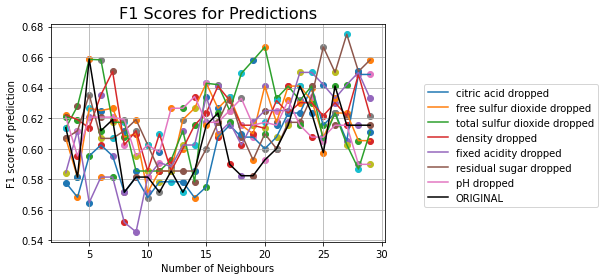

In [44]:
for c in corr_cols:
    f = []
    for i in range(3,30):
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
        knn.fit(X_train_all_scaled.drop(c, axis=1), Y_train_all)
        preds = knn.predict(X_test_scaled.drop(c, axis=1))
        score = f1_score(Y_test, preds)
        f.append(score)
        plt.scatter(i, score)
    plt.plot([i for i in range(3,30)], f, label= c + ' dropped')
    plt.legend()

# dla oryginalnych danych (bez usuniętych kolumn)
original = []
for i in range(3,30):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
    knn.fit(X_train_all_scaled, Y_train_all)
    preds = knn.predict(X_test_scaled)
    score = f1_score(Y_test, preds)
    original.append(score)
    plt.scatter(i, score)
    
plt.plot([i for i in range(3,30)],original,color='black',label = 'ORIGINAL')
plt.legend(frameon=1,bbox_to_anchor = (1.1,0.75))
plt.title("F1 Scores for Predictions",fontsize = 16)
plt.xlabel("Number of Neighbours")
plt.ylabel("F1 score of prediction")
plt.grid()
        

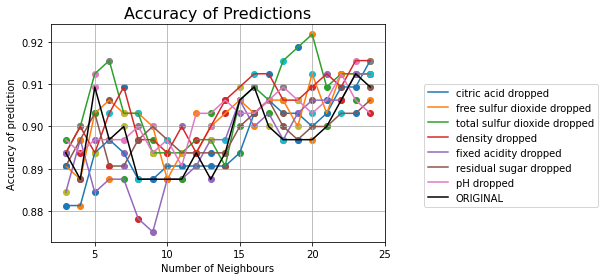

In [45]:
final = dict()
for c in corr_cols:
    f = []
    for i in range(3,25):
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
        knn.fit(X_train_all_scaled.drop(c, axis=1), Y_train_all)
        preds = knn.predict(X_test_scaled.drop(c, axis=1))
        score = accuracy_score(Y_test, preds)
        f.append(score)
        plt.scatter(i, score)
    final[c] = f
    plt.plot([i for i in range(3,25)], f, label= c + ' dropped')
    plt.legend()

# dla oryginalnego set'u (bez usuwania kolumn)
original = []
for i in range(3,25):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
    knn.fit(X_train_all_scaled, Y_train_all)
    preds = knn.predict(X_test_scaled)
    score = accuracy_score(Y_test, preds)
    original.append(score)
    plt.scatter(i, score)
    
plt.plot([i for i in range(3,25)],original,color='black',label = 'ORIGINAL')
plt.legend(frameon=1,bbox_to_anchor = (1.1,0.75))
plt.title("Accuracy of Predictions",fontsize = 16)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy of prediction")
plt.grid()
        

## Analiza
 - Usunięcie <b>pH i gęstości </b> z zestawu danych faktycznie poprawił accuracy i wynik f1.
 - Na podstawie tabeli korelacji zauważono, że <b>pH</b> miało najsłabszą korelację między gęstością a pH, a zatem w ostatecznym modelu zmienna <b>pH została pominięta.</b>
 - Najlepszą dokładność i wyniki f1 uzyskano z <b> 12 najbliższymi sąsiadami</b>.

## Model ostateczny

<b> KNN klasyfikator o: </b>
 - liczbie sąsiadów = 12
 - zmienna usunięta = pH
 - miara odległości = euklidesowa

In [46]:
knn = KNeighborsClassifier(n_neighbors=12, n_jobs=-1, metric='euclidean', weights='distance')

In [47]:
knn.fit(X_train_all_scaled.drop('pH', axis=1), Y_train_all)
preds = knn.predict(X_test_scaled.drop('pH', axis=1))

In [48]:
f1 = f1_score(Y_test, preds)
accuracy = accuracy_score(Y_test, preds)

In [49]:
f1

0.6265060240963854

In [50]:
accuracy

0.903125

### Macież pomyłek

In [51]:
def show_labels(c):
    plt.text(0.4, 0.75, c[0][1], fontsize=15) ##True negatives
    plt.text(1.4,0.75,c[0][1],fontsize=15) ## False positives
    plt.text(0.4,1.25,c[1][0],fontsize=15) ## False Negatives
    plt.text(1.4,1.25,c[1][1],fontsize=15) ## True Positives

In [52]:
Y_test

1581    0
1501    0
801     0
928     0
1163    0
       ..
1351    0
1099    0
933     0
708     0
195     0
Name: Wine_Quality, Length: 320, dtype: int64

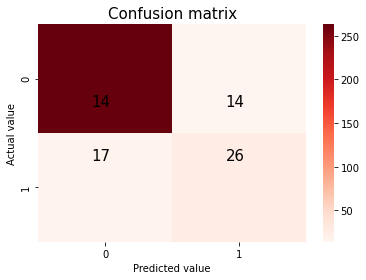

In [55]:
c1 = confusion_matrix(Y_test, preds)
sns.heatmap(c1, cmap='Reds')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion matrix", fontsize=15)
show_labels(c1)
plt.show()

## Wyniki modelu

In [54]:
print("SCORES OF KNN CLASSIFIER MODEL NORMALIZED WITH Z1 NORMALISATION")
print("Recall of model: ", recall(Y_test, preds))
print("Precision of model: ", precision(Y_test, preds))
print("Accuracy of model: ", accuracy_score(Y_test, preds))
print("F1 score of model: ", f1_score(Y_test, preds))

SCORES OF KNN CLASSIFIER MODEL NORMALIZED WITH Z1 NORMALISATION
Recall of model:  0.6046512
Precision of model:  0.65
Accuracy of model:  0.903125
F1 score of model:  0.6265060240963854
